In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### データを生成する

In [11]:
x = np.linspace(0, 10, 100)
y = x + np.random.randn(100)

x = [1, 2, 3]
y = [4, 5, 6]

x = ["a", "b", "c"]
y = [4, 5, 6]

### とりあえずグラフを作成してみる

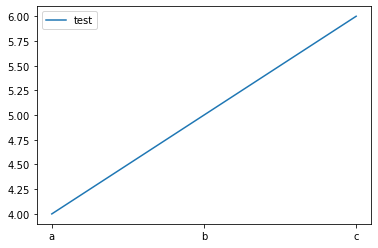

In [12]:
fig = plt.figure()  # figureオブジェクトを作成
ax = fig.add_subplot(1, 1, 1)  # figureに属するaxesオブジェクトを作成
ax.plot(x, y, label="test")
ax.legend()

### DataFrameをグラフにする

In [165]:
data = [{"p1": 1, "p2": 2}, {"p1": 3, "p2": 4}]

df = pd.DataFrame(data, index=["test1", "test2_aaaaaaaaaaaaaaa"])

In [166]:
df

,p1,p2
test1,1,2
test2_aaaaaaaaaaaaaaa,3,4


<AxesSubplot:>

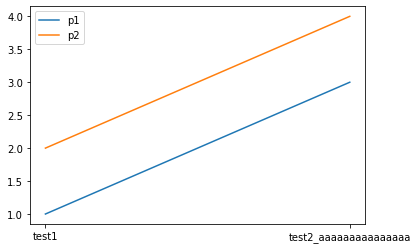

In [167]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xticks([0, 1])  # メモリ位置のリスト
# ax.set_xticklabels(["a", "b"])  # 表示値のリスト

# axでplotするとこうなる？
# ax.plot(df["p1"], label="p1", linestyle="-", marker="", markersize=15)
# ax.plot(df["p2"], label="p2", linestyle="", marker=".", markersize=10)
# ax.legend()

# dfでプロットするとこれ。結果は同じ
df.plot(ax=ax, legend=True)

### グラフのタイトルを表示する

<AxesSubplot:>

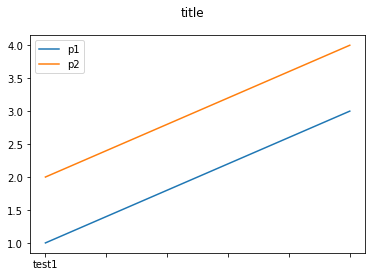

In [62]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig.suptitle("title")
df.plot(ax=ax, legend=True)

### グラフに線を引く

In [171]:
data = [{"p1": 1, "p2": 2, "p3": 3}, {"p1": 3, "p2": 4, "p3": 3}]

df = pd.DataFrame(data, index=["test1", "test2"])

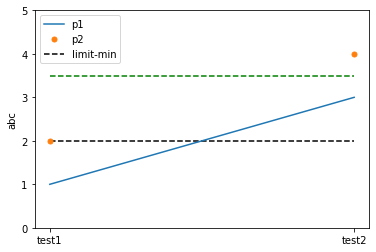

In [172]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xticks([0, 1])  # メモリ位置のリスト
ax.plot(df["p1"], label="p1", linestyle="-", marker="", markersize=15)
ax.plot(df["p2"], label="p2", linestyle="", marker=".", markersize=10)
ax.hlines(
    y=[2.0, 3.5],
    xmin=0,
    xmax=1,
    linestyles={"dashed"},
    colors=["black", "green"],
    label="limit-min",
)
ax.set_ylim(0, 5)
ax.set_ylabel("abc")
ax.legend()

In [173]:
data = [
    {"pin": "P1857A1_aaaaaaaaaaaaa", "tr": 40, "tf": 45},
    {"pin": "P1857A2", "tr": 45, "tf": 55},
    {"pin": "P1857A3", "tr": 50, "tf": 65},
]

df = pd.DataFrame(data)
df = df.set_index("pin")

In [174]:
df

,tr,tf
pin,,
P1857A1_aaaaaaaaaaaaa,40,45
P1857A2,45,55
P1857A3,50,65


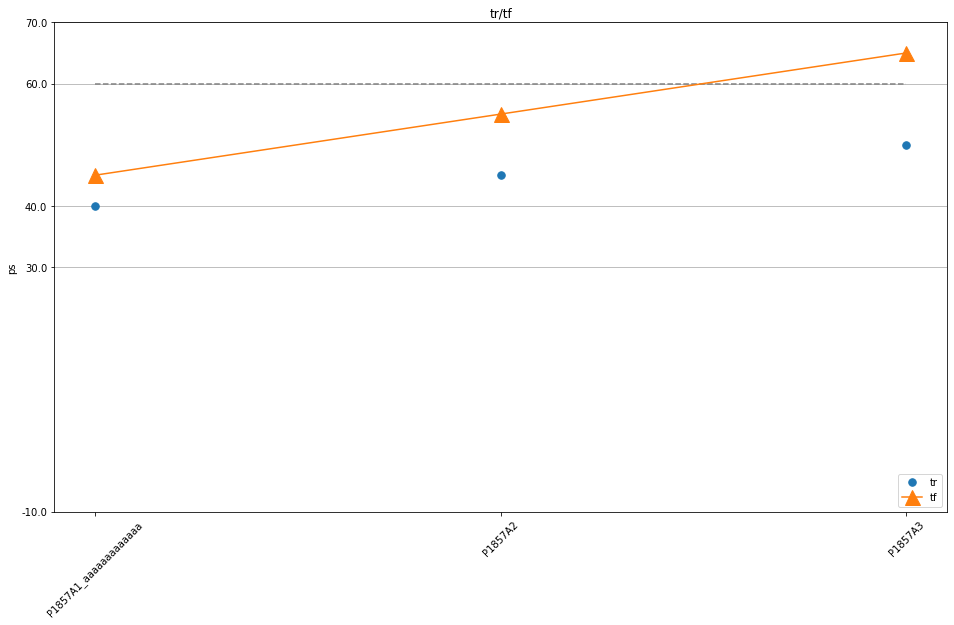

<Figure size 432x288 with 0 Axes>

In [182]:
fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(1, 1, 1)
ax.plot(df["tr"], label="tr", linestyle="", marker=".", markersize=15)
ax.plot(df["tf"], label="tf", linestyle="-", marker="^", markersize=15)
ax.set_ylim(-10, 70)

ax.set_ylabel("ps")
ax.set_title("tr/tf")
ax.set_yticks([-10, 30, 40, 60, 70])
ax.legend(loc="lower right")
ax.hlines(
    y=[60],
    xmin=0,
    xmax=2,
    linestyles={"dashed"},
    colors=["gray", "green"],
    label="limit-min",
)
ax.grid(axis="y")
ax.yaxis.set_major_formatter(plt.FormatStrFormatter("%.1f"))
# ax.set_xticklabels(df.index.values,rotation=45, ha="center")
ax.tick_params(axis="x", rotation=45)
# fig.subplots_adjust(bottom=0.2)
# ax.minorticks_on()
plt.show()
plt.savefig("a.png")